In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

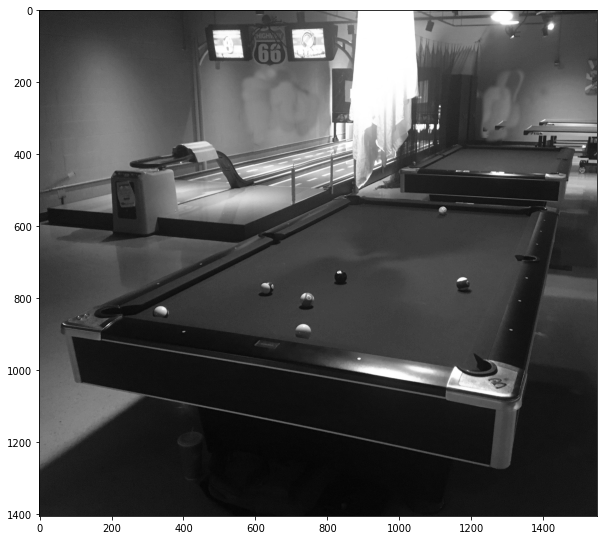

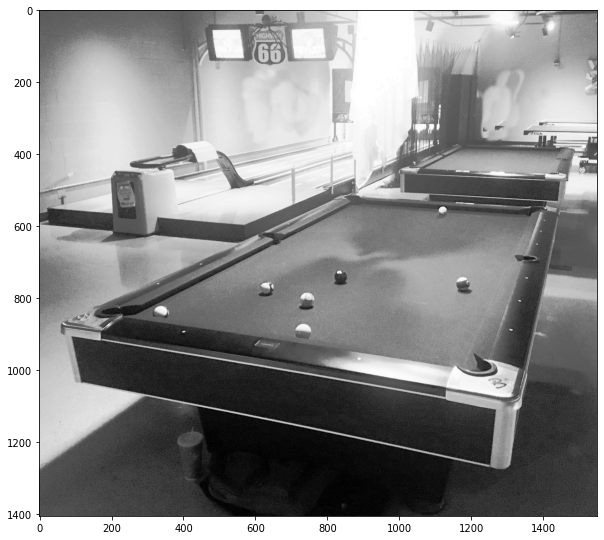

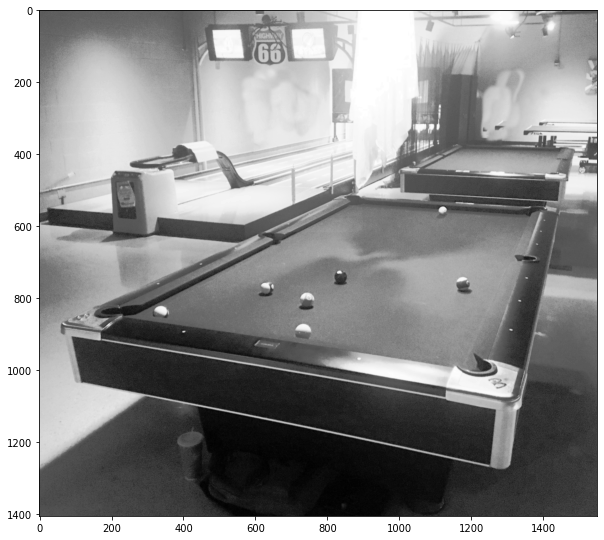

In [2]:
# https://stackoverflow.com/questions/35922687/pre-processing-image-before-applying-canny-edge-detection
# https://stackoverflow.com/questions/25354004/how-to-connect-lines-after-probabilistic-hough-transform
# https://stackoverflow.com/questions/45531074/how-to-merge-lines-after-houghlinesp
# https://stackoverflow.com/questions/36452491/opencv-python-houghlinesp-strange-results
# https://stackoverflow.com/questions/25303396/choosing-lines-from-hough-lines
img = cv2.imread('pool table.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray, 'gray')
plt.show()

# cv2.equalizeHist(img_copy2)
img_hist = cv2.equalizeHist(gray)
plt.figure(figsize=(10,10))
plt.imshow(img_hist, 'gray')
plt.show()

# cv2.GaussianBlur(img_copy4, (3, 3), 0)
img_blur = cv2.GaussianBlur(img_hist, (3,3), 0)
plt.figure(figsize=(10,10))
plt.imshow(img_blur, 'gray')
plt.show()

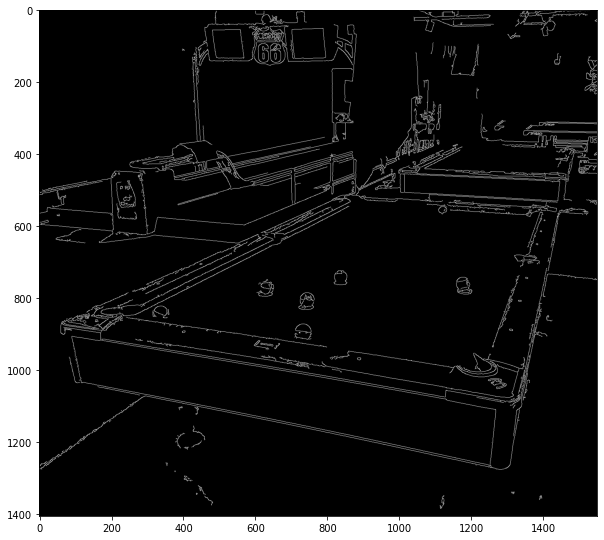

number of lines: (148, 1, 4)


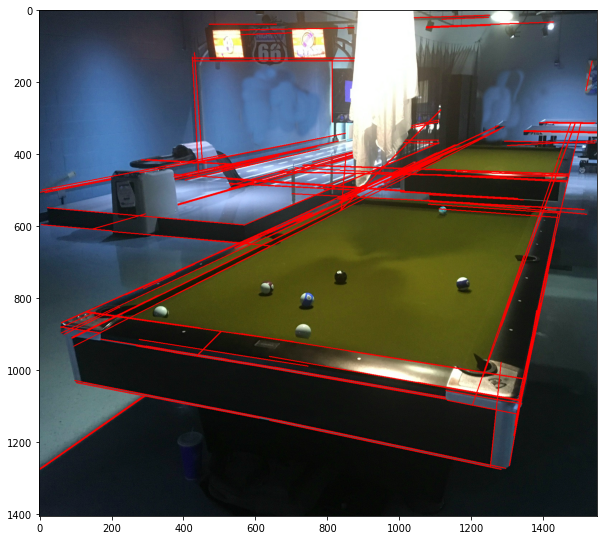

125


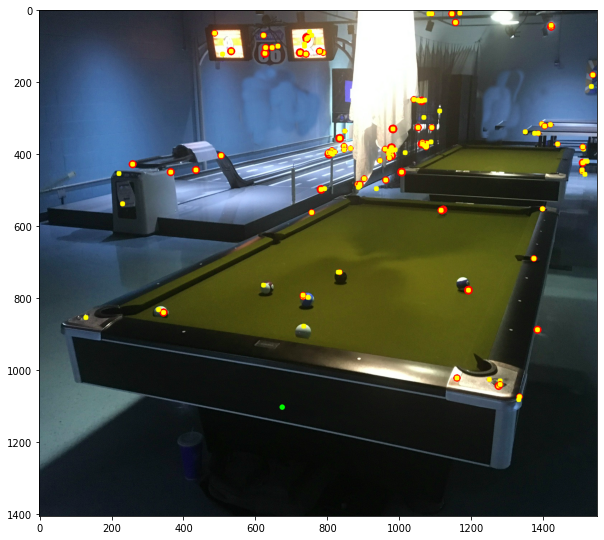

In [39]:
low_thres = 50
high_thres = 150
edges = cv2.Canny(img_blur, low_thres, high_thres, None, 3)
plt.figure(figsize=(10,10))
plt.imshow(edges, 'gray')
plt.show()

# lines = cv2.HoughLines(edges, 1, np.pi/180, 150)
# print('number of lines: {}'.format(lines.shape))

# #bg = np.zeros_like(img)
# bg = img.copy()
# for line in lines:
#     rho,theta = tuple(line[0])
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*(a))
#     cv2.line(bg,(x1,y1),(x2,y2),(255,0,0),2)

# plt.figure(figsize=(10,10))
# plt.imshow(bg)
# plt.show()

# minLineLength = 50
# maxLineGap = 30
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 120, minLineLength=60, maxLineGap=70)
print('number of lines: {}'.format(lines.shape))

#bg = np.zeros_like(img)
bg = img.copy()

for line in lines:
#     print(line)
    x1,y1,x2,y2  = tuple(line[0])
    cv2.line(bg,(x1,y1),(x2,y2),(255,0,0),2)

# for i in range(30):
#     x1,y1,x2,y2  = tuple(lines[i][0])
#     cv2.line(bg,(x1,y1),(x2,y2),(255,0,0),2)

plt.figure(figsize=(10,10))
plt.imshow(bg)
plt.show()

# ------------------------------
# low_thres = 50
# high_thres = 150
# edges = cv2.Canny(gray, low_thres, high_thres, None, 3)
# plt.figure(figsize=(10,10))
# plt.imshow(edges, 'gray')
# plt.show()

height, width = gray.shape
# print(height)
# print(width)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 3, param1=130, param2=10, minRadius=0, maxRadius=10)
print(len(circles[0]))
bg2 = img.copy()
circles = np.uint16(np.around(circles))
for i in circles[0, :]:
    # draw the outer circle
    cv2.circle(bg2, (i[0], i[1]), i[2], (255, 0, 0), 5)
    # draw the center of the circle
    cv2.circle(bg2, (i[0], i[1]), 2, (255, 255, 0), 10)
    
cv2.circle(bg2, (int(width/2)-100, int(height/2)+400), 4, (0, 255, 0), 5)

plt.figure(figsize=(10, 10))
plt.imshow(bg2)
plt.show()